# Here I will show how we can compress the signal with a lossless method and re-construct it perfectly

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# import the signal
s = np.load('test_data_sintef.npy')

## Original signal

5 points in our data from channel 1 and 2:
[-2218, -1150, -1260, -1976, -1334]
[-1762, -1118, -1002, -1852, -1154]

 Binary values:
['0000100010101010', '0000010001111110', '0000010011101100', '0000011110111000', '0000010100110110']
['0000011011100010', '0000010001011110', '0000001111101010', '0000011100111100', '0000010010000010']


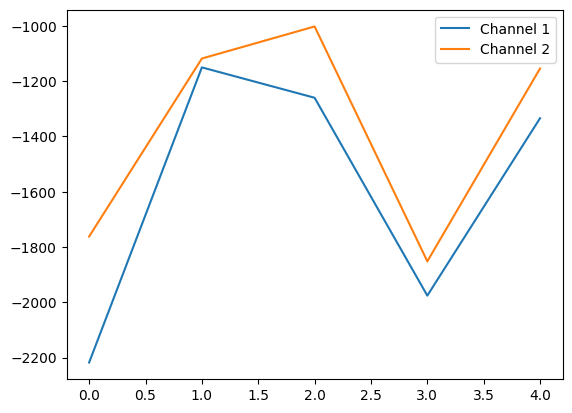

In [29]:
# take 5 samples from channel 1 and 2
x1 = [int(s[10250,0]), int(s[10251,0]), int(s[10252,0]), int(s[10253,0]),int(s[10254,0])]
x2 = [int(s[10250,1]), int(s[10251,1]), int(s[10252,1]), int(s[10253,1]),int(s[10254,1])]

# get their binary values
x1_bin = [bin(x1[0])[3:].zfill(16), bin(x1[1])[3:].zfill(16), bin(x1[2])[3:].zfill(16), bin(x1[3])[3:].zfill(16), bin(x1[4])[3:].zfill(16)]
x2_bin = [bin(x2[0])[3:].zfill(16), bin(x2[1])[3:].zfill(16), bin(x2[2])[3:].zfill(16), bin(x2[3])[3:].zfill(16), bin(x2[4])[3:].zfill(16)]


#Print and plot the inforation
print('5 points in our data from channel 1 and 2:')
print(x1)
print(x2)
print('\n Binary values:')
print(x1_bin)
print(x2_bin)

plt.plot(x1)
plt.plot(x2)
plt.legend(['Channel 1', 'Channel 2'])

## Perfrom Smoothen_5

<span style="font-size:18pt; color:#800000">send: (x[n] + x[n-1] + x[n-2] + x[n-3] + x[n-4])/5</span>

5 points after Smoothen_5:
[ -443  -673  -925 -1320 -1587]


Text(0.5, 1.0, 'Perform Smoothen_5')

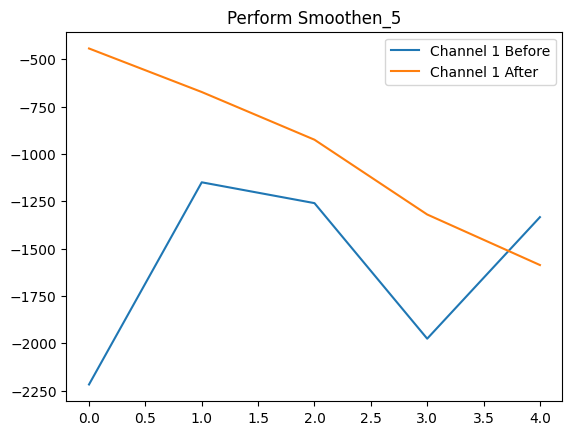

In [5]:
# Take the mean of the 5 latest values and send this
temp = np.concatenate([np.array([0,0,0,0]), x1]) # we set the values "before" the first sample to be zero
x1_1 = np.zeros_like(x1)
x1_1[0] = int( np.mean(temp[:5]))
x1_1[1] = int( np.mean(temp[1:6]))
x1_1[2] = int( np.mean(temp[2:7]))
x1_1[3] = int( np.mean(temp[3:8]))
x1_1[4] = int( np.mean(temp[4:9]))

# same for channel two
temp = np.concatenate([np.array([0,0,0,0]), x2])
x2_1 = np.zeros_like(x2)
x2_1[0] = int( np.mean(temp[:5]))
x2_1[1] = int( np.mean(temp[1:6]))
x2_1[2] = int( np.mean(temp[2:7]))
x2_1[3] = int( np.mean(temp[3:8]))
x2_1[4] = int( np.mean(temp[4:9]))


# Print and plot the results
print('5 points after Smoothen_5:')
print(x1_1)

plt.plot(x1)
plt.plot(x1_1)
plt.legend(['Channel 1 Before', 'Channel 1 After'])
plt.title('Perform Smoothen_5')

<span style="font-size:16pt">We see that the new signal is more smooth, which makes the next methods work better</span>

## Perform DPCM

<span style="font-size:18pt; color:#800000">Send: $x[n] - x[n-1]$</span>

5 points after DPCM:
[-443 -230 -252 -395 -267]


Text(0.5, 1.0, 'Perform DPCM')

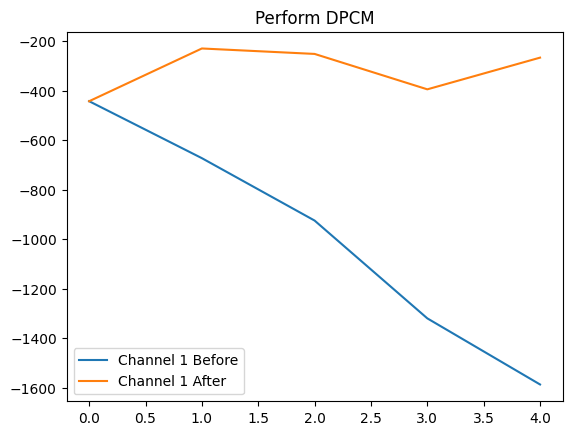

In [6]:
# Take the difference between the previous value and the curren one, and send this
x1_2 = np.zeros_like(x1_1)
x1_2[0] = x1_1[0] - 0 
x1_2[1] = x1_1[1] - x1_1[0] 
x1_2[2] = x1_1[2] - x1_1[1] 
x1_2[3] = x1_1[3] - x1_1[2] 
x1_2[4] = x1_1[4] - x1_1[3] 

# do the same for channel 2
x2_2 = np.zeros_like(x2_1)
x2_2[0] = x2_1[0] - 0 
x2_2[1] = x2_1[1] - x2_1[0] 
x2_2[2] = x2_1[2] - x2_1[1] 
x2_2[3] = x2_1[3] - x2_1[2] 
x2_2[4] = x2_1[4] - x2_1[3] 


# print and plot the results
print('5 points after DPCM:')
print(x1_2)

plt.plot(x1_1)
plt.plot(x1_2)
plt.legend(['Channel 1 Before', 'Channel 1 After'])
plt.title('Perform DPCM')

<span style="font-size:16pt">We see that the new values are much lower (meaning less data needs to be sent)</span>

## Perfrom Sum/Diff

<span style="font-size:18pt; color:#800000">Send: $Channel 1 + Channel 2$</span> <br>
<span style="font-size:18pt; color:#800000">and: $Channel 1 - Channel 2$</span>

5 points after Sum/Diff:
Sum of channels: [-397 -227 -226 -382 -249]
Difference between channels: [-45  -3 -26 -12 -18]


Text(0.5, 1.0, 'Perform Sum/Diff')

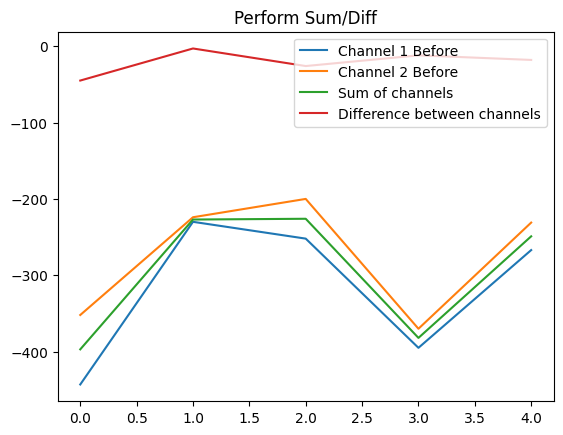

In [28]:
# Find the difference between, and mean of the two channels and send this
D = (     0.5*(x1_2 - x2_2)            ).astype(int)
S = (     0.5*(x1_2 + x2_2)            ).astype(int)
DS = np.concatenate((D,S)) # puts the two array together


# print and plot the result
print('5 points after Sum/Diff:')
print(f'Sum of channels: {S}')
print(f'Difference between channels: {D}')

plt.plot(x1_2)
plt.plot(x2_2)
plt.plot(S)
plt.plot(D)
plt.legend(['Channel 1 Before', 'Channel 2 Before', 'Sum of channels', 'Difference between channels'])
plt.title('Perform Sum/Diff')

<span style="font-size:16pt">We see that the Sum is about the same value as before, but the Difference is much lower (meaning less data needs to be sent)</span>

## Perform Rice coding

<span style="font-size:18pt; color:#800000">Q = x[n] >> k </span> </br>
<span style="font-size:18pt; color:#800000">R = x[n] & (2^k -1)</span> </br>
<span style="font-size:18pt; color:#800000">Send: QR</span>

In [27]:
# This might be the most techical step, but the idea is mostly to use less bits to represent the same value
# We devide the value by a number 2**5 and send the result and the remainder
encoded_values = []
k = 5
divisor = 2**k

len_rice = 0
len_original = 0 

for value in DS:
    sign_bit = "1" if value < 0 else "0"
    abs_value = abs(value)

    quotient = abs_value // divisor
    remainder = abs_value % divisor

    unary_code = "1" * quotient + "0"
    binary_code = bin(remainder)[2:].zfill(divisor.bit_length() - 1)

    encoded_values.append(sign_bit + unary_code + binary_code)

    len_rice += len(encoded_values[-1])
    len_original += 16 # since the bit lengths are 16 to start with



# Print the result
print(f'Binary values after Rice coding: {encoded_values[:5]}')
print(f'Binary values before Rice coding: {x1_bin} \n')

print(f'Total length before: {len_original}')
print(f'Total length after: {len_rice} \n')

print(f'len_original/len_compressed (CR): {len_original/len_rice :.2f}')

Binary values after Rice coding: ['11001101', '1000011', '1011010', '1001100', '1010010']
Binary values before Rice coding: ['0000100010101010', '0000010001111110', '0000010011101100', '0000011110111000', '0000010100110110'] 

Total length before: 160
Total length after: 115 

len_original/len_compressed (CR): 1.39


<span style="font-size:16pt">We see that the new binary strings are shorter then before (meaning we can send the same information in a shorter time -> less power used)</span>

## Plot the final results

Text(0.5, 1.0, 'Signal before and after compression')

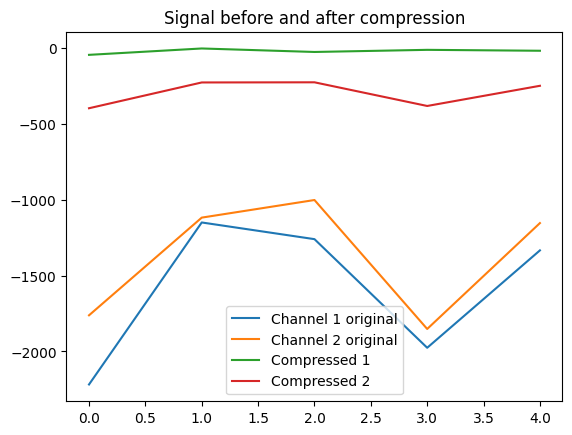

In [9]:
plt.plot(x1)
plt.plot(x2)
plt.plot(D)
plt.plot(S)
plt.legend(['Channel 1 original', 'Channel 2 original', 'Compressed 1', 'Compressed 2'])
plt.title('Signal before and after compression')

<span style="font-size:16pt">We see that the compressed signals we are sending have much lower values then the original signals, but they contain exactly the same information!!</span>

## Reconstruct the original signal

Now we will see how we can work our way back to the original signal:

In [12]:
# The idea is to simply do the opposite of what we did to compress 

# Decode Rice 
divisor = 2**5
decoded_values = []

for encoded_value in encoded_values:
    sign_bit = encoded_value[0]
    quotient = encoded_value[1:].index("0") #+ 1
    remainder = int(encoded_value[quotient + 1:], 2)

    value = quotient * divisor + remainder
    if sign_bit == "1":
        value = -value

    decoded_values.append(value)

# Decode Sum/Diff
D_ = np.array(decoded_values[:5])
S_ = np.array(decoded_values[5:])
x1_2_ = S_ + D_
x2_2_ = S_ - D_

# Decode DPCM
x1_1_ = np.zeros_like(x1_2_)
x1_1_[0] = x1_2_[0] 
x1_1_[1] = x1_2_[1] + x1_1_[0] 
x1_1_[2] = x1_2_[2] + x1_1_[1] 
x1_1_[3] = x1_2_[3] + x1_1_[2] 
x1_1_[4] = x1_2_[4] + x1_1_[3] 

x2_1_ = np.zeros_like(x2_2_)
x2_1_[0] = x2_2_[0] 
x2_1_[1] = x2_2_[1] + x2_1_[0] 
x2_1_[2] = x2_2_[2] + x2_1_[1] 
x2_1_[3] = x2_2_[3] + x2_1_[2] 
x2_1_[4] = x2_2_[4] + x2_1_[3] 

# Decode Smoothen_5
x1_ = np.zeros_like(x1_1_)
x1_[0] = 5*x1_1_[0] 
x1_[1] = 5*x1_1_[1] - np.sum(x1_)
x1_[2] = 5*x1_1_[2] - np.sum(x1_)
x1_[3] = 5*x1_1_[3] - np.sum(x1_)
x1_[4] = 5*x1_1_[4] - np.sum(x1_)

x2_ = np.zeros_like(x2_1_)
x2_[0] = 5*x2_1_[0] 
x2_[1] = 5*x2_1_[1] - np.sum(x2_)
x2_[2] = 5*x2_1_[2] - np.sum(x2_)
x2_[3] = 5*x2_1_[3] - np.sum(x2_)
x2_[4] = 5*x2_1_[4] - np.sum(x2_)

## Reconstruction results

Text(0.5, 1.0, 'Reconstructed signal')

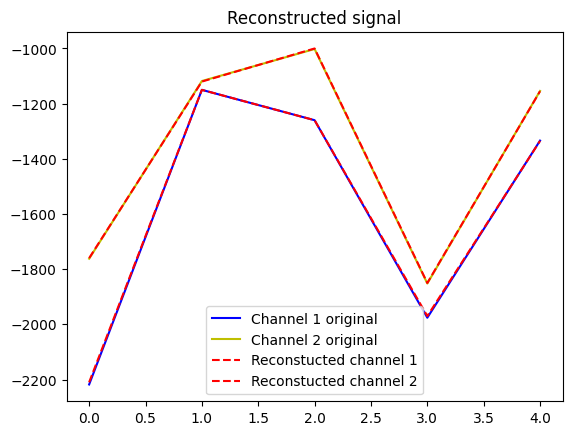

In [13]:
# plot the result
plt.plot(x1, 'b')
plt.plot(x2, 'y')
plt.plot(x1_, 'r--')
plt.plot(x2_, 'r--')
plt.legend(['Channel 1 original', 'Channel 2 original', 'Reconstucted channel 1', 'Reconstucted channel 2'])
plt.title('Reconstructed signal')

<span style="font-size:16pt">We see that the reconstucted signal is exacly equal to the original signal!</span>

## System impact

[Cuevas-López et al. (2022)](https://www.mdpi.com/1424-8220/22/10/3676#B2-sensors-22-03676) shows how a similar algorithm can be implemented on an FPGA with less then half the computational power as ours. 

The figure below illustrates that the algorithm takes way less energy then what it saves. Furthermore, our system uses Bluetooth instead of Wifi for transmission, meaning that what is yellow in the figure will take much less power for us. Meaning that our compression savings will be more impactful




<img src="https://www.mdpi.com/sensors/sensors-22-03676/article_deploy/html/images/sensors-22-03676-g008.png" alt="alternative text" width="1200" />

Using the algorithm illustrated above on all the data we get around 2 times compression, meaning we could for example:
1) double the amount of channels, 
2) double the batterylife, 
3) make the the chip lighter and smaller, 

<span style="font-size:15pt">without sacrificing any data!</span>

All in all the algorithm does: 
* 4 additions
* 2 subtractions 
* 2 multiplication 
* 1 left shift operation
* 1 And operation

per sample.

<span style="font-size:15pt">Meaning little work, but a lot of benefit</span>